In [1]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cv2

In [2]:
from sklearn.metrics import accuracy_score

def KNN_best_params(X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray):
    knn = KNeighborsClassifier()

    param_grid = {
        'n_neighbors': list(range(1, 75)),
        # 'weights': ['uniform', 'distance'],
        # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        # 'p': [1, 2],
    }

    grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")  # 5-fold cross-validation
    grid_search_knn.fit(X_train, y_train)

    y_pred_train = grid_search_knn.predict(X_train)
    y_pred_test = grid_search_knn.predict(X_test)

    best_model_config = grid_search_knn.best_params_
    max_train_score = accuracy_score(y_train, y_pred_train)
    max_test_score = accuracy_score(y_test, y_pred_test)

    return [max_train_score, max_test_score, best_model_config]
    

# Iris Dataset

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Optimal value of k: 1


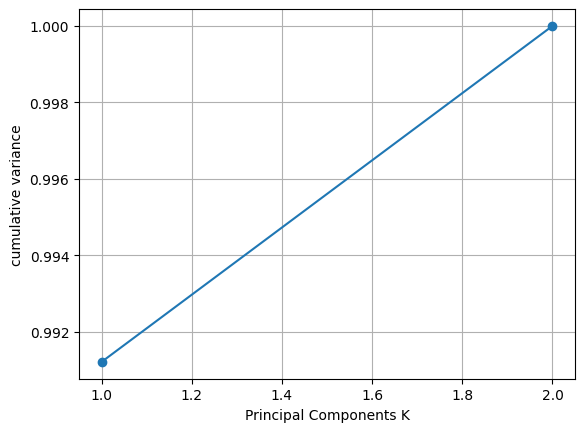

In [17]:
lda = LDA()

lda.fit(X, y)

var_threshold = 0.95
variance_ratios = lda.explained_variance_ratio_
cum_variance_ratios = np.cumsum(variance_ratios)

optimal_k = np.argmax(cum_variance_ratios >= var_threshold) + 1
print(f"Optimal value of k: {optimal_k}")

plt.plot(range(1, len(cum_variance_ratios) + 1), cum_variance_ratios, marker='o')
plt.xlabel('Principal Components K')
plt.ylabel('cumulative variance')
plt.grid(True)
plt.show()


In [19]:
lda = LDA(n_components=2)
reduced_X = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.2, random_state=1)

In [20]:
KNN_best_params(X_train, X_test, y_train, y_test)

[0.975, 0.9666666666666667, {'n_neighbors': 11}]

In [21]:
lda = LDA(n_components=1)
reduced_X = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.2, random_state=1)

In [22]:
KNN_best_params(X_train, X_test, y_train, y_test)

[0.975, 1.0, {'n_neighbors': 44}]